## Figure 1e ##

This notebook contains the code for reproducing figure 1e. Figures are then stored inside the folder 'Fig1_figures'

In [2]:
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt 

In [5]:
file = pd.ExcelFile('Data_Fig1.xlsx')
df = pd.read_excel(file,sheet_name='fig_1e')
print(df.shape)
print(df.head())

(34, 7)
  nhp_id  trainid  regression_slope  Unnamed: 3 nhp_id.1  trainid.1  \
0      a        1          0.109252         NaN        m        1.0   
1      a        1          0.051582         NaN        m        1.0   
2      a        1          0.299283         NaN        m        1.0   
3      a        1          0.400794         NaN        m        1.0   
4      a        1          0.356632         NaN        m        1.0   

   regression_slope.1  
0           -0.168468  
1            0.061179  
2            0.248513  
3           -0.222770  
4           -0.124088  


In [ ]:
# trainid is 1 when in train (NTS) is 0 when in test (MNAV task)
df['trainid'].value_counts()

trainid
1    27
0     7
Name: count, dtype: int64

In [14]:
a= df[['nhp_id','trainid','regression_slope']]
m= df[['nhp_id.1','trainid.1','regression_slope.1']].rename(columns={'nhp_id.1':'nhp_id','trainid.1':'trainid','regression_slope.1':'regression_slope'})
print(m.isna().sum())
m= m.dropna()

nhp_id              1
trainid             1
regression_slope    1
dtype: int64


34 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34] 1


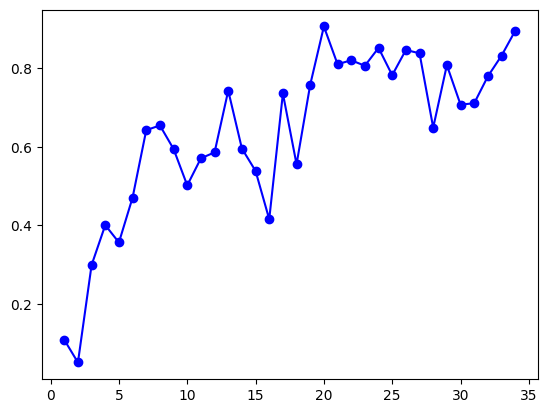

In [20]:
N= len(a['trainid'])
arr= np.arange(1,len(a['trainid'])+1)
plt.plot(arr,a['regression_slope'], linestyle= '-',marker = 'o', color= 'blue')
print(N,arr,a['trainid'][0])

In [47]:
def plot_1e(df_monkey,title,save, filename):
    df_train = df_monkey[df_monkey['trainid'] == 1]
    df_test = df_monkey[df_monkey['trainid']== 0]

    n_train = len(df_train)
    n_test = len(df_test)

    x_train = np.arange(1,n_train + 1)
    x_test = np.arange(n_train + 1, n_train + n_test + 1)

    y_train= df_train['regression_slope'].values
    y_test= df_test['regression_slope'].values

    plt.figure(figsize=(5,3))

    plt.plot(x_train,y_train,'-o', color="#1e1ca0cb",label= 'Training sessions')
    plt.plot(x_test,y_test,'-o', color= '#d62728',label = 'Generalization sessions')

    plt.xlabel("Behavioural sessions", fontsize=11)
    plt.ylabel("Regression slope", fontsize=11)
    plt.title(title, fontsize=12)

    plt.legend(frameon=False)
    

    # Clean spines like other figs
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)


    plt.tight_layout()
    if save and filename is not None:
        os.makedirs('Fig1_figures', exist_ok=True)
        plt.savefig(f'Fig1_figures/{filename}.png', dpi=300, bbox_inches="tight")

    plt.show()
    plt.close()


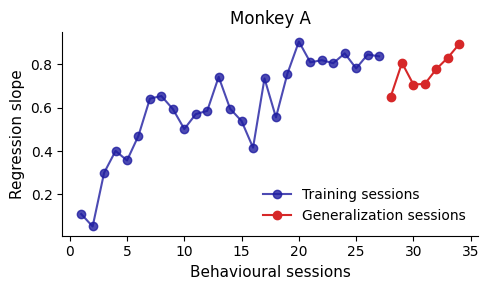

In [48]:
plot_1e(a,'Monkey A',save = True, filename= 'Fig1e_MonkeyA')

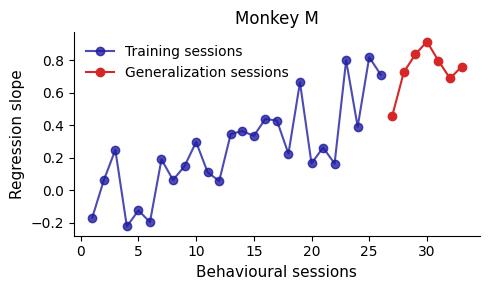

In [49]:
plot_1e(m,'Monkey M',save = True, filename= 'Fig1e_MonkeyM')